# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices.


In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

Banks on which the EDA was performed:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


#### Reading the Data from Google

In [2]:
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2023, 1, 1)

In [3]:
# Reading Data from the google:

# Bank of America
BAC = data.DataReader("BAC", "av-daily", start, end, api_key='ALPHAVANTAGE_API_KEY')

# CitiGroup
C = data.DataReader("C", "av-daily", start, end, api_key='ALPHAVANTAGE_API_KEY')

# Goldman Sachs
GS = data.DataReader("GS", "av-daily", start, end, api_key='ALPHAVANTAGE_API_KEY')

# JPMorgan Chase
JPM = data.DataReader("JPM", "av-daily", start, end, api_key='ALPHAVANTAGE_API_KEY')

# Morgan Stanley
MS = data.DataReader("MS", "av-daily", start, end, api_key='ALPHAVANTAGE_API_KEY')

# Wells Fargo
WFC = data.DataReader("WFC", "av-daily", start, end, api_key='ALPHAVANTAGE_API_KEY')

In [4]:
tickers=['BAC','C','GS','JPM','MS','WFC']

#### Merging all the data sheets of banks

In [5]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers) #Concat all the banks into one DataFrame

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.head()

Bank Ticker    BAC                                      C                \
Stock Info    open   high    low  close     volume   open   high    low   
2013-01-02   12.05  12.15  11.90  12.03  236021400  40.91  41.40  40.70   
2013-01-03   12.01  12.05  11.88  11.96  157149700  41.17  41.50  41.04   
2013-01-04   11.97  12.11  11.93  12.11  132601900  41.76  42.54  41.63   
2013-01-07   12.15  12.20  12.00  12.09  201403500  42.54  42.55  41.97   
2013-01-08   12.09  12.10  11.89  11.98  168461100  42.29  42.47  42.03   

Bank Ticker                     ...       MS                                 \
Stock Info     close    volume  ...     open   high    low  close    volume   
2013-01-02   41.2500  45648500  ...  20.1601  20.17  19.51  19.62  29812900   
2013-01-03   41.3900  38343300  ...  19.4600  19.61  19.32  19.58  29859500   
2013-01-04   42.4298  46310100  ...  19.6800  20.25  19.58  20.19  31983900   
2013-01-07   42.4700  36305100  ...  20.0200  20.13  19.67  19.80  21445100   
2013-01-08   42.4600  28185200  ...  19.7400  19.79  19.59  19.65  22206200   

Bank Ticker    WFC                                 
Stock Info    open   high    low  close    volume  
2013-01-02   35.03  35.07  34.74  35.05  30443000  
2013-01-03   34.98  35.04  34.61  34.76  25374800  
2013-01-04   34.59  35.04  34.45  34.94  31420300  
2013-01-07   34.91  34.97  34.47  34.77  28135100  
2013-01-08   34.68  34.79  34.43  34.71  20132600  

[5 rows x 30 columns]

#### Data converting to an Excel sheet:

In [8]:
bank_stocks.to_csv('Banks_Prices.csv')



## EDA




## Section 1: Analysing the 6 stocks

### Let's find the trend of the given time duration (2013-2023) of all stocks

<Axes: >

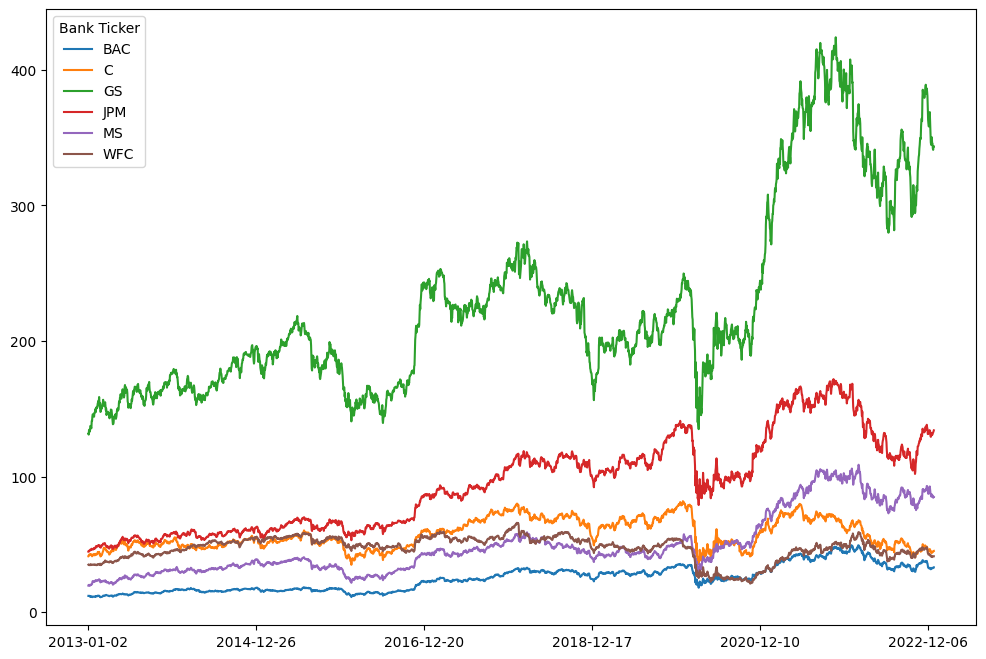

In [9]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').plot(figsize=(12,8))

#### Individual Plots:

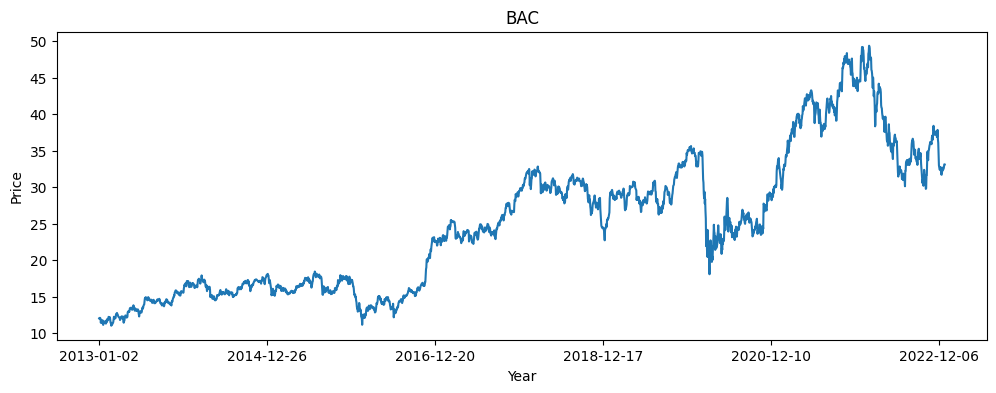

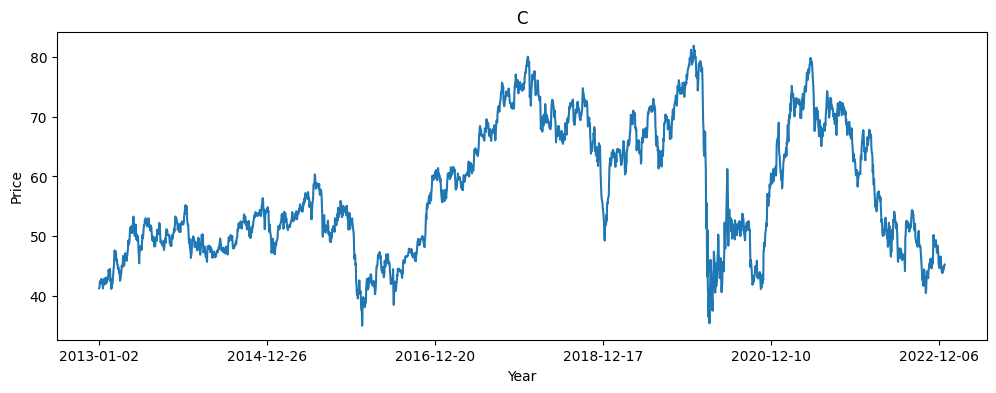

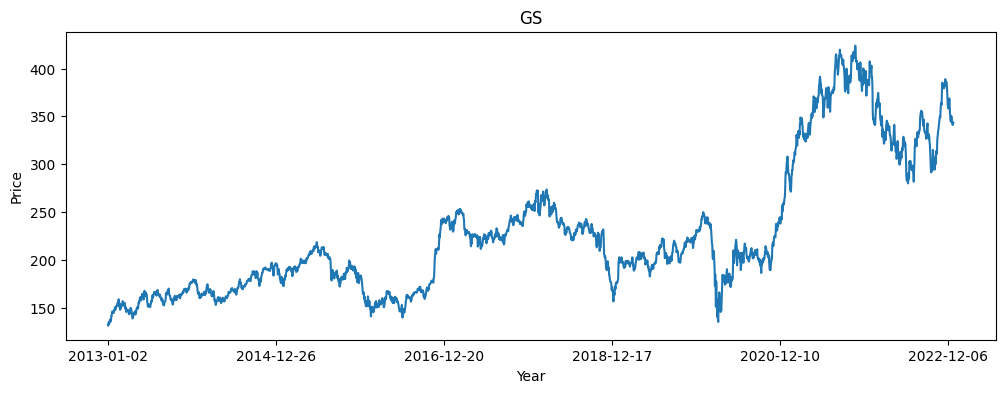

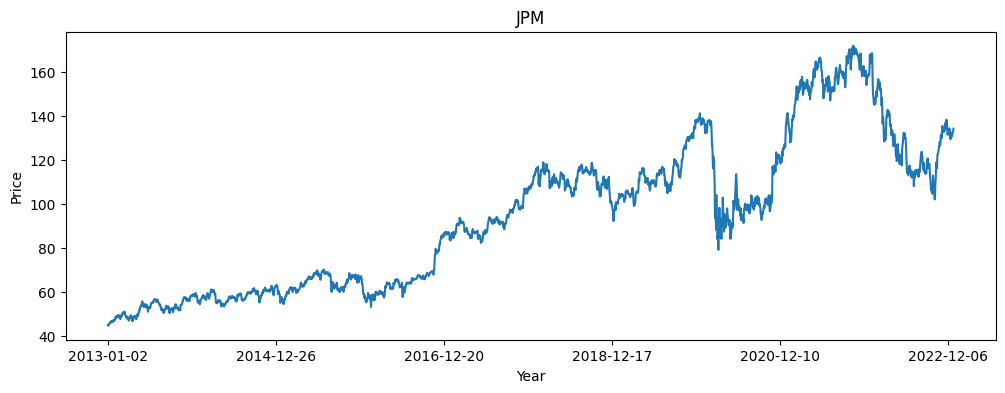

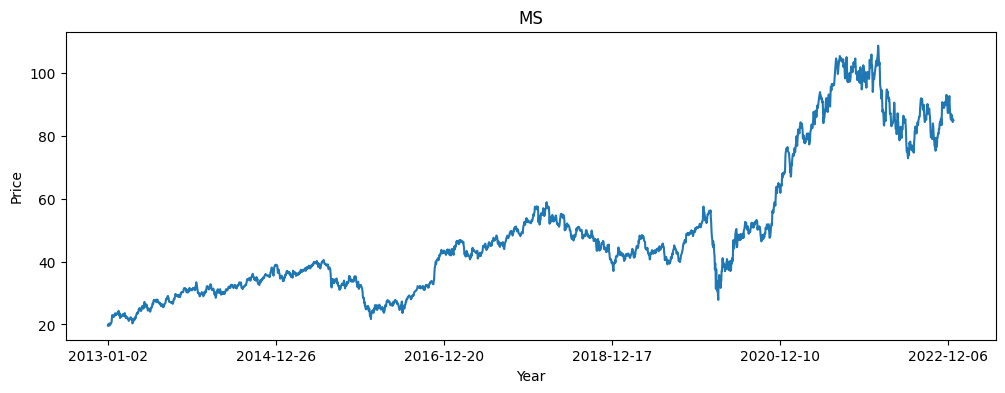

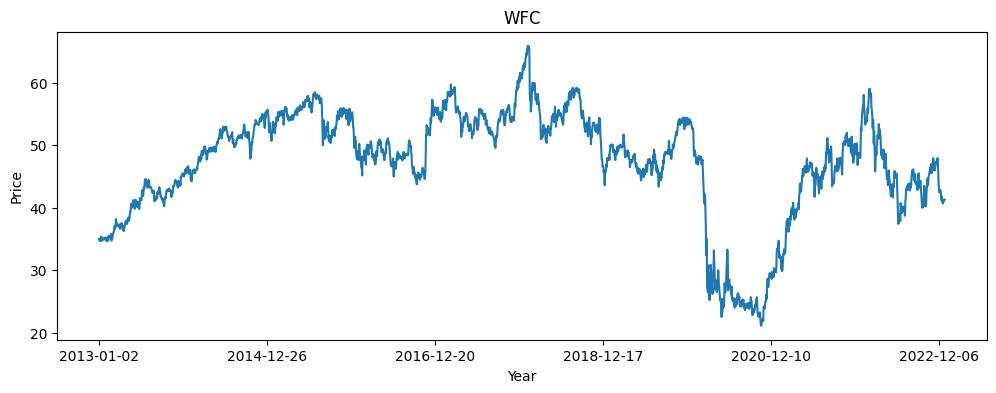

In [10]:
for tick in tickers:
    bank_stocks[tick]['close'].plot(figsize=(12,4),label=tick)
    plt.title(tick)
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

In [11]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').describe()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,24.963757,57.563610,226.784766,94.615413,49.094315,47.340665
std,9.420001,10.726082,69.661438,33.742694,22.073486,8.650991
min,11.030000,34.980000,130.940000,44.570000,19.580000,21.140000
25%,16.112500,48.815000,174.695000,61.372500,32.540000,43.872500
50%,24.470000,54.305000,206.405000,95.505000,43.320000,48.875000
75%,31.077500,67.467500,246.855000,115.542500,53.397500,53.667500
max,49.380000,81.910000,423.850000,171.780000,108.730000,65.930000


The above table shows the minimum, maximum closing price values of the all the stocks

#### Conclusion: 
* So if you look at the above graph you can see that the price of stock BAC, GS, JPM, and MS has steeply increased from 2013 to 2023 and the price of C and WFC is almost the same in 10 years.
* Goldman Sachs (GS) has the highest standard deviation, indicating greater price variability compared to the other banks. Wells Fargo (WFC) has the lowest standard deviation, suggesting relatively stable stock prices.

### Returns DataFrame

In [12]:
returns=pd.DataFrame()

In [13]:
for t in tickers:
    returns[t+' Return']=bank_stocks[t]['close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.005819,0.003394,-0.005469,-0.002015,-0.002039,-0.008274
2013-01-04,0.012542,0.025122,0.027264,0.017725,0.031154,0.005178
2013-01-07,-0.001652,0.000947,-0.001859,0.001102,-0.019316,-0.004865
2013-01-08,-0.009098,-0.000235,-0.009012,0.001982,-0.007576,-0.001726


 * The table represents the percentage change in the closing price compared to the preceding day.
 * Example: On 2013-01-04 MS had increased 3.1% in its price 

#### Statistical Desciption of Returns Table

In [14]:
returns.describe()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,0.000590,0.000243,0.000536,0.000580,0.000775,0.000239
std,0.019371,0.020278,0.017632,0.016913,0.019647,0.018614
min,-0.153974,-0.192986,-0.127053,-0.149649,-0.156000,-0.158676
25%,-0.008929,-0.009138,-0.008291,-0.007383,-0.009047,-0.007881
50%,0.000442,0.000191,0.000422,0.000295,0.000637,0.000186
75%,0.010272,0.009187,0.009619,0.008464,0.011044,0.008035
max,0.177962,0.179843,0.175803,0.180125,0.197700,0.145347


<Axes: >

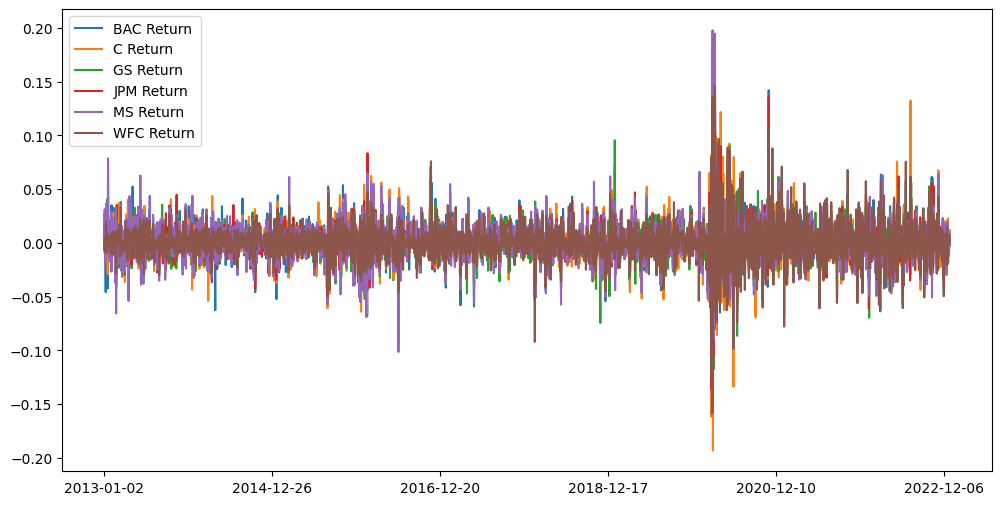

In [15]:
returns.plot(figsize=(12,6))

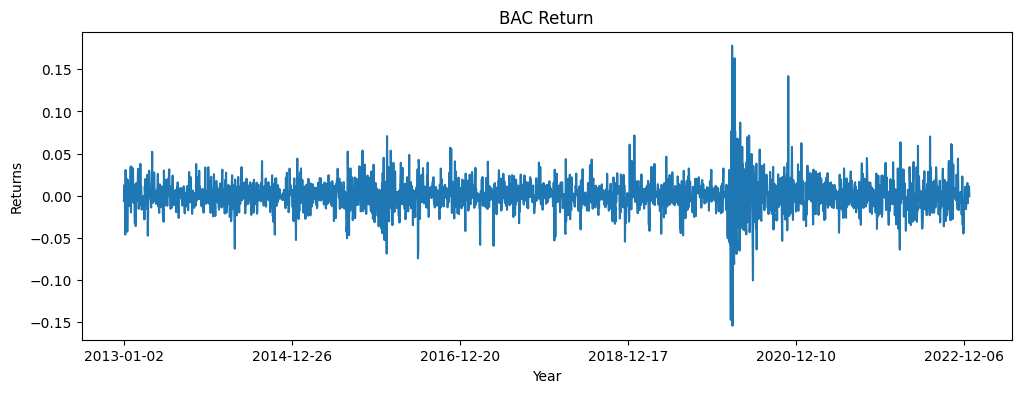

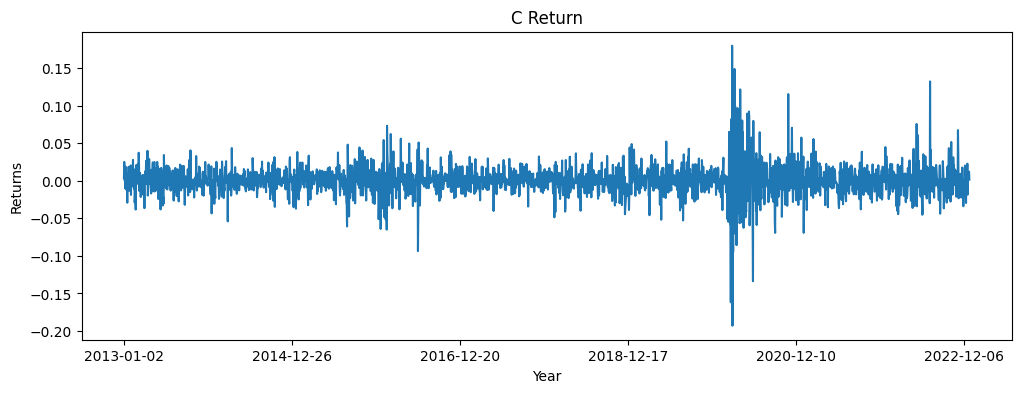

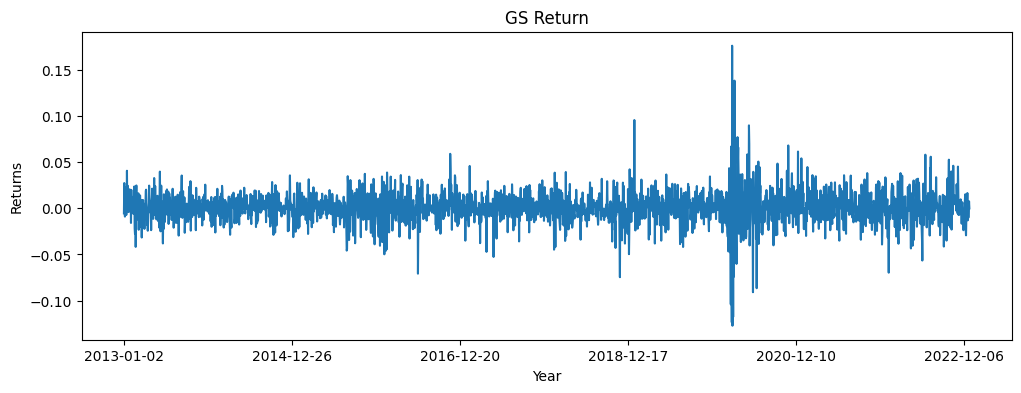

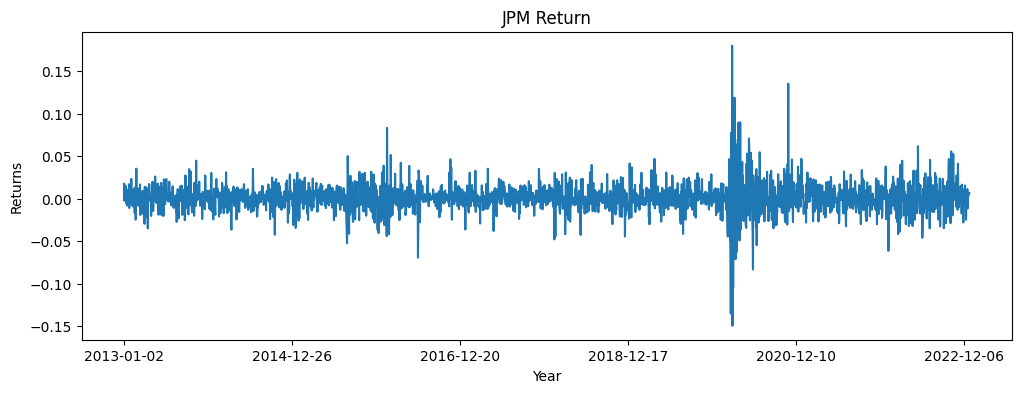

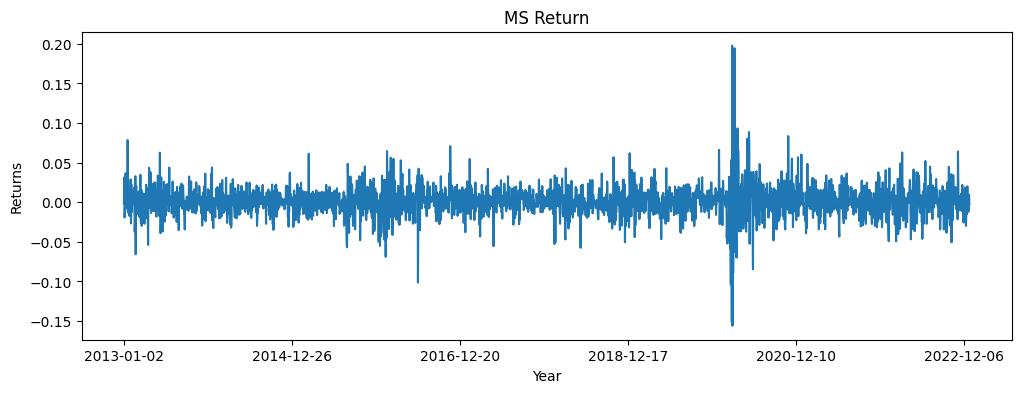

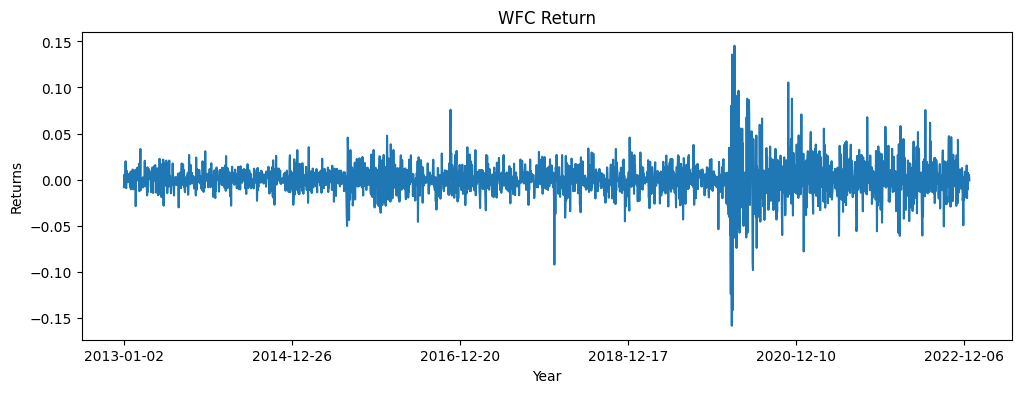

In [16]:
for i in returns.columns:
    returns[i].plot(figsize=(12,4))
    plt.title(i)
    plt.xlabel('Year')
    plt.ylabel('Returns')
    plt.show()

In [17]:
returns.loc[returns.idxmax()]

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
2020-03-13,0.177962,0.179843,0.175803,0.180125,0.197700,0.135662
2020-03-13,0.177962,0.179843,0.175803,0.180125,0.197700,0.135662
2020-03-13,0.177962,0.179843,0.175803,0.180125,0.197700,0.135662
2020-03-13,0.177962,0.179843,0.175803,0.180125,0.197700,0.135662
2020-03-13,0.177962,0.179843,0.175803,0.180125,0.197700,0.135662
2020-03-24,0.163164,0.148912,0.138031,0.118942,0.194534,0.145347


* Above table show the date when the each stock has given the maximum returns

In [18]:
returns.loc[returns.idxmin()]

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
2020-03-16,-0.153974,-0.192986,-0.127053,-0.149649,-0.1560,-0.142117
2020-03-16,-0.153974,-0.192986,-0.127053,-0.149649,-0.1560,-0.142117
2020-03-16,-0.153974,-0.192986,-0.127053,-0.149649,-0.1560,-0.142117
2020-03-16,-0.153974,-0.192986,-0.127053,-0.149649,-0.1560,-0.142117
2020-03-16,-0.153974,-0.192986,-0.127053,-0.149649,-0.1560,-0.142117
2020-03-12,-0.095280,-0.148258,-0.123393,-0.082430,-0.1508,-0.158676


* Above table show the date when the each stock has given the minimum returns

<Axes: >

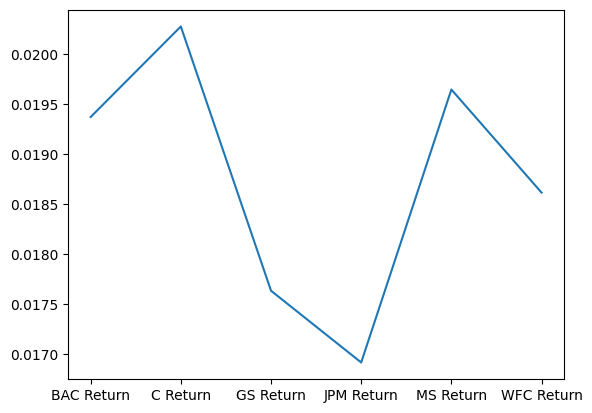

In [19]:
returns.std().plot()

#### Conclusion:
* On average, Bank of America (BAC), Goldman Sachs (GS), JPMorgan Chase (JPM), and Morgan Stanley (MS) have positive mean returns, indicating a general positive trend in average performance. 
Citigroup (C) and Wells Fargo (WFC) also have positive mean returns, though they are slightly lower than the others
* Citigroup (C) has the highest standard deviation, suggesting a slightly higher level of volatility compared to the other stocks.
.

#### Skewness and Kurtosis

In [20]:
returns.skew()

BAC Return    0.271058
C Return      0.004132
GS Return     0.122082
JPM Return    0.337988
MS Return     0.376431
WFC Return    0.014777
dtype: float64

* Bank of America (BAC), Goldman Sachs (GS), JPMorgan Chase (JPM), and Morgan Stanley (MS) have positive returns, suggesting a right-skewed distribution. 
A right-skewed distribution means that the majority of returns are concentrated on the left side of the distribution, with a few extreme positive values on the right
* Citigroup (C) and Wells Fargo (WFC) have returned close to zero (0.004132 and 0.014777, respectively). 
The returns for these two stocks appear to be close to symmetric, indicating a more balanced distribution without a strong skew in either direction..

In [21]:
returns.kurtosis()

BAC Return    10.295947
C Return      13.531748
GS Return     10.284346
JPM Return    14.086920
MS Return     12.312592
WFC Return    10.460358
dtype: float64

* The magnitude of kurtosis for the returns is relatively high, especially for JPMorgan Chase (JPM) with a return of 14.086920.
High positive kurtosis suggests that the distribution has more extreme values than a normal distribution.

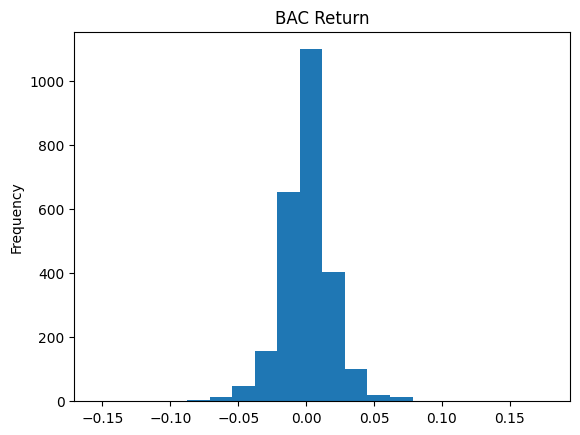

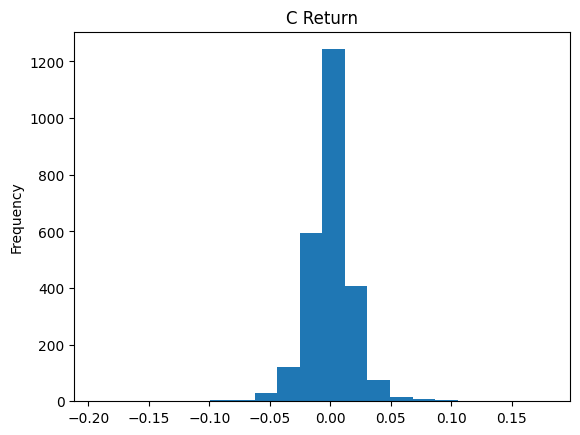

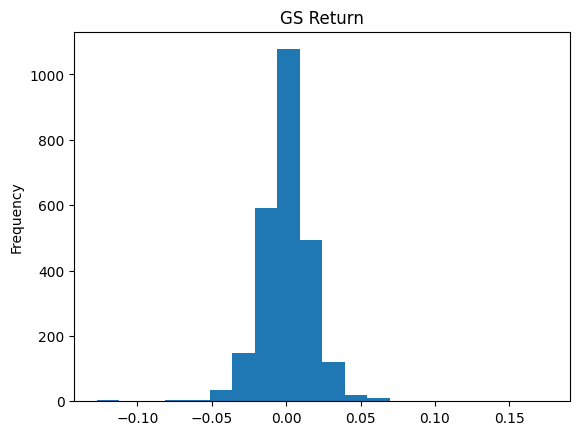

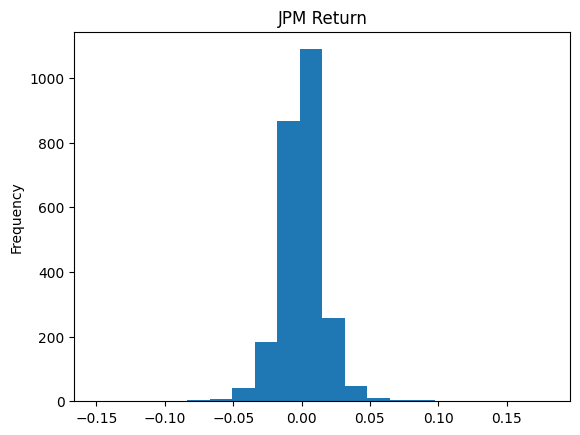

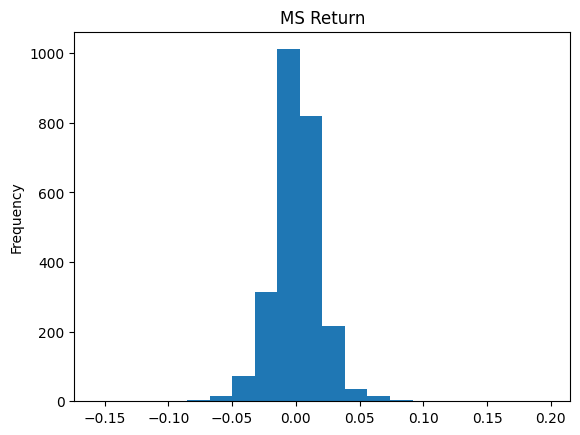

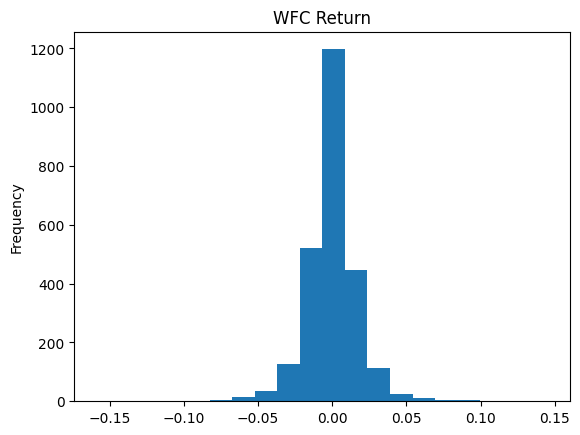

In [22]:
for i in returns.columns:
    returns[i].plot(kind='hist',bins=20)
    plt.title(i)
    plt.show()

#### Boxplot for checking the outliers


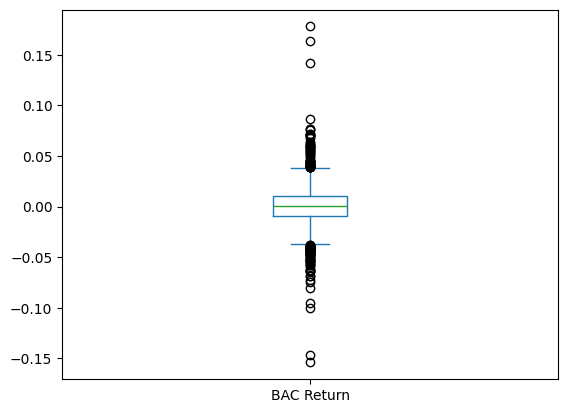

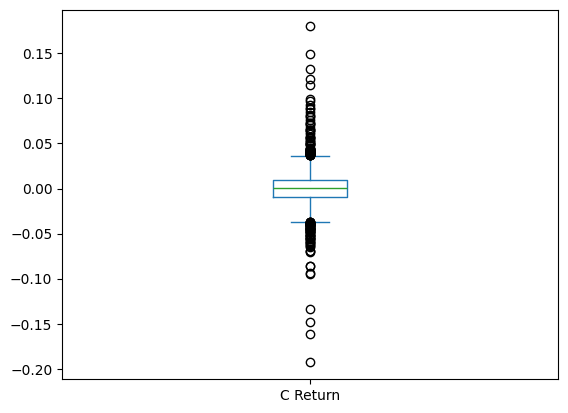

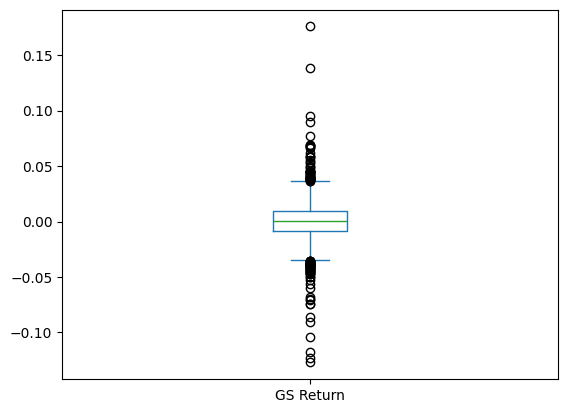

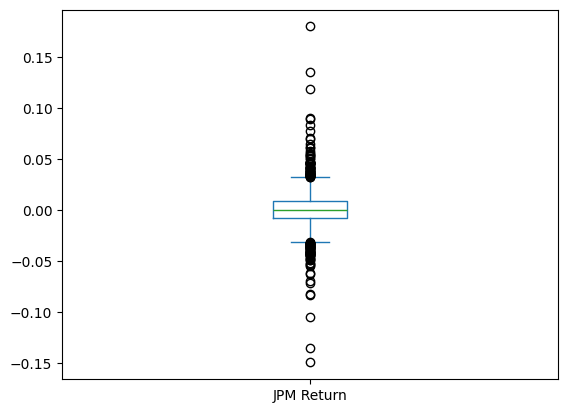

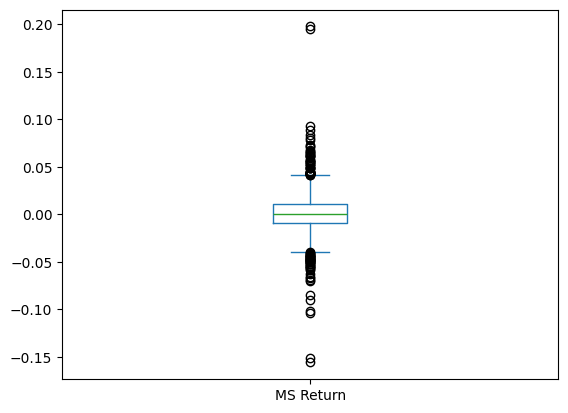

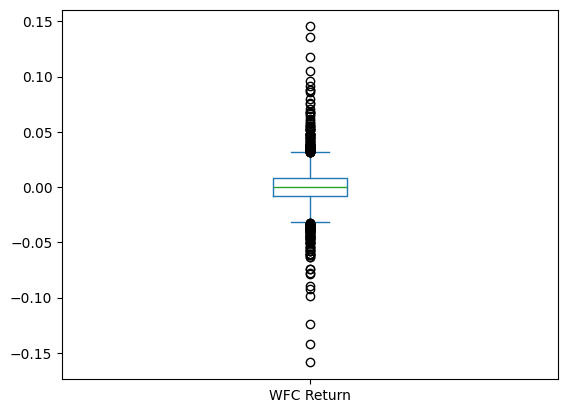

In [23]:
for i in returns.columns:
    returns[i].plot(kind='box')
    plt.show()

#### Annualized Returns for all the stocks

In [24]:
annualized_return=np.prod((1+returns)**(252/len(returns)))-1
annualized_return

C:\Users\Viraj Chordiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


BAC Return    0.106668
C Return      0.009261
GS Return     0.100690
JPM Return    0.116321
MS Return     0.158065
WFC Return    0.016533
dtype: float64

* Morgan Stanley and JPMorgan Chase stand out with higher expected annualized returns, indicating strong performance expectations.* 
Bank of America and Goldman Sachs have moderate expected annualized returns, suggesting a balanced performance outloo
* Wells Fargo exhibits a relatively lower expected annualized return, and Citigroup has the lowest expected annualized return among the listed banks.
nks.

#### Annualized Volitality for all the stocks

In [25]:
annualized_volatility = np.std(returns)*np.sqrt(252)
annualized_volatility

C:\Users\Viraj Chordiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


BAC Return    0.307447
C Return      0.321835
GS Return     0.279844
JPM Return    0.268440
MS Return     0.311819
WFC Return    0.295434
dtype: float64

* **Citigroup** stands out with the highest annualized volatility, indicating a potentially higher level of risk and price fluctuations.
* **Bank of America, Morgan Stanley, JPMorgan Chase, and Goldman Sachs** show moderate levels of annualized volatility, reflecting a balance between risk and stability.
* **Wells Fargo** has the lowest annualized volatility among the listed banks, suggesting a relatively lower level of price variability.

#### Sharpe Ratio

In [26]:
sharpe_ratio = (annualized_return - 0.1) / annualized_volatility
sharpe_ratio

BAC Return    0.021689
C Return     -0.281943
GS Return     0.002467
JPM Return    0.060798
MS Return     0.186213
WFC Return   -0.282524
dtype: float64

* **Morgan Stanley** appears to be the top performer in terms of risk-adjusted returns, as it has the highest Sharpe ratio.
* **Bank of America and JPMorgan Chase** also show positive risk-adjusted returns, indicating a satisfactory balance between risk and return.
* **Goldman Sachs** has a positive Sharpe ratio but at a lower level compared to the top performers.
* **Citigroup and Wells Fargo** have negative Sharpe ratios, suggesting that their returns may not adequately compensate for the level of risk involved.

#### Analyze value at risk (VAR) at 95 % confidence

In [27]:
returns['BAC Return'] = returns['BAC Return'].sort_values(ascending = True)
var_tcs = returns['BAC Return'].quantile(0.05)
var_tcs

-0.028174756369325822

In [28]:
returns['C Return'] = returns['C Return'].sort_values(ascending = True)
var_tcs = returns['C Return'].quantile(0.05)
var_tcs

-0.028965157614260016

In [29]:
returns['GS Return'] = returns['GS Return'].sort_values(ascending = True)
var_tcs = returns['GS Return'].quantile(0.05)
var_tcs

-0.02579438132123397

In [30]:
returns['JPM Return'] = returns['JPM Return'].sort_values(ascending = True)
var_tcs = returns['JPM Return'].quantile(0.05)
var_tcs

-0.024829198827794108

In [31]:
returns['MS Return'] = returns['MS Return'].sort_values(ascending = True)
var_tcs = returns['MS Return'].quantile(0.05)
var_tcs

-0.02866845704055012

In [32]:
returns['WFC Return'] = returns['WFC Return'].sort_values(ascending = True)
var_tcs = returns['WFC Return'].quantile(0.05)
var_tcs

-0.027019668868949062

### Now Analyse 3 Years Data

In [33]:
df=bank_stocks.loc['2020-05-01':]
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    open   high    low  close    volume   open   high    low  close   
2020-05-01   23.38  23.46  22.81  23.08  51666432  46.31  46.47  45.22  45.52   
2020-05-04   22.70  22.99  22.43  22.93  45807008  45.03  45.36  43.98  45.12   
2020-05-05   23.48  23.52  22.62  22.66  45628101  46.30  46.35  43.92  43.95   
2020-05-06   23.00  23.08  22.23  22.35  53742506  44.49  45.02  42.72  42.95   
2020-05-07   22.66  23.37  22.61  22.84  51822356  43.52  45.16  43.44  44.64   

Bank Ticker            ...     MS                                   WFC  \
Stock Info     volume  ...   open   high    low  close    volume   open   
2020-05-01   28098078  ...  38.35  38.72  37.91  38.40  12804507  28.50   
2020-05-04   26316642  ...  38.00  38.22  37.17  38.09  13979799  26.96   
2020-05-05   27315208  ...  38.98  39.31  37.90  37.98   8946306  27.52   
2020-05-06   25001758  ...  38.47  38.63  37.05  37.30   7816025  26.46   
2020-05-07   29834229  ...  37.76  39.14  37.76  38.81   9348930  25.59   

Bank Ticker                                 
Stock Info    high    low  close    volume  
2020-05-01   28.53  27.28  27.59  35168043  
2020-05-04   27.45  26.60  27.35  34165223  
2020-05-05   27.80  26.25  26.32  56672077  
2020-05-06   26.65  25.40  25.61  57578287  
2020-05-07   26.10  25.14  25.23  52204551  

[5 rows x 30 columns]

In [34]:
df.xs(key='close',axis=1,level='Stock Info').describe()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
count,673.00000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,35.43049,57.848321,313.786984,132.030832,79.289346,40.153522
std,7.34826,10.630709,69.616653,23.851115,18.471781,9.748424
min,20.87000,40.450000,171.800000,84.030000,36.990000,21.140000
25%,29.96000,48.840000,259.590000,113.730000,68.050000,30.180000
50%,36.04000,55.470000,330.220000,131.580000,83.680000,43.450000
75%,41.23000,67.980000,370.100000,154.280000,92.460000,46.980000
max,49.38000,79.860000,423.850000,171.780000,108.730000,59.060000


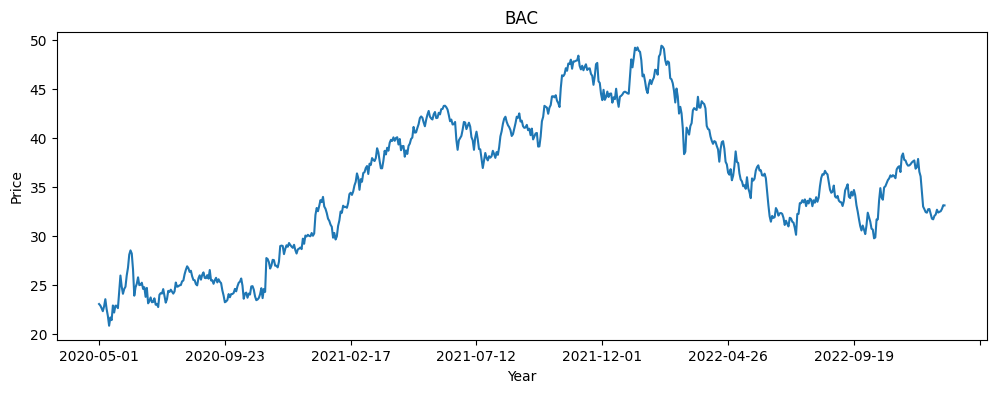

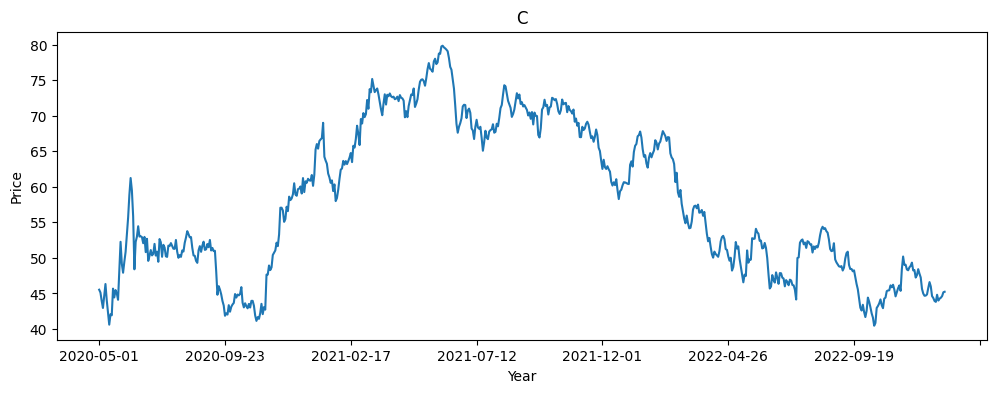

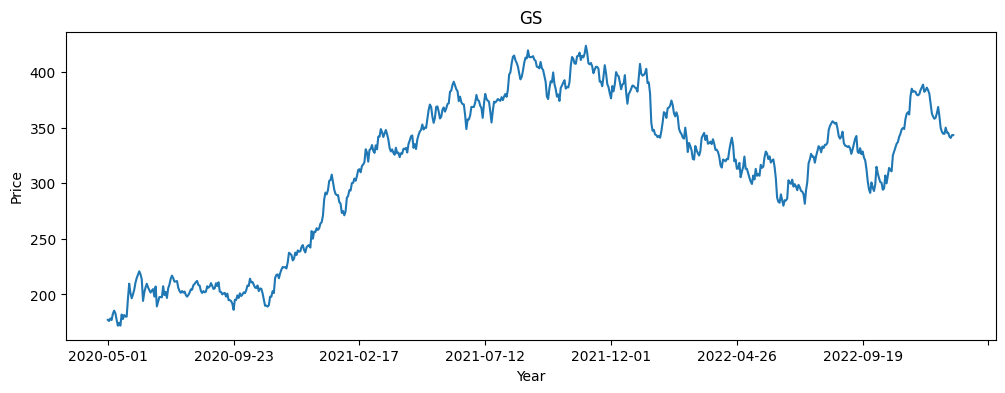

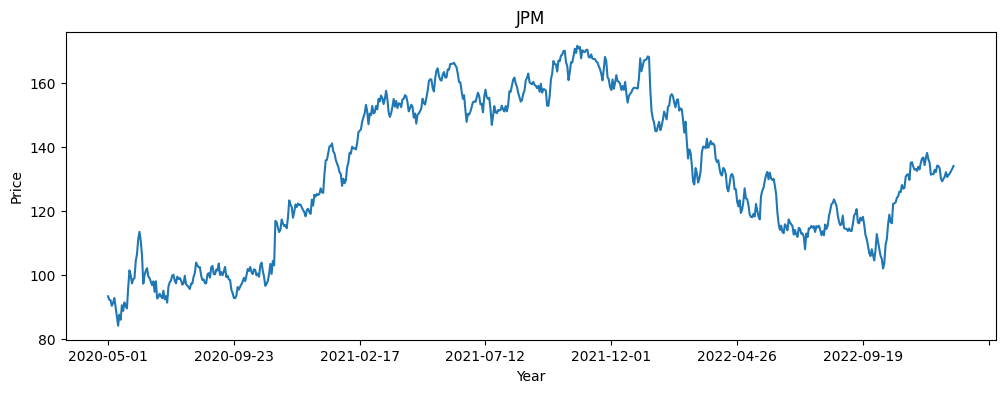

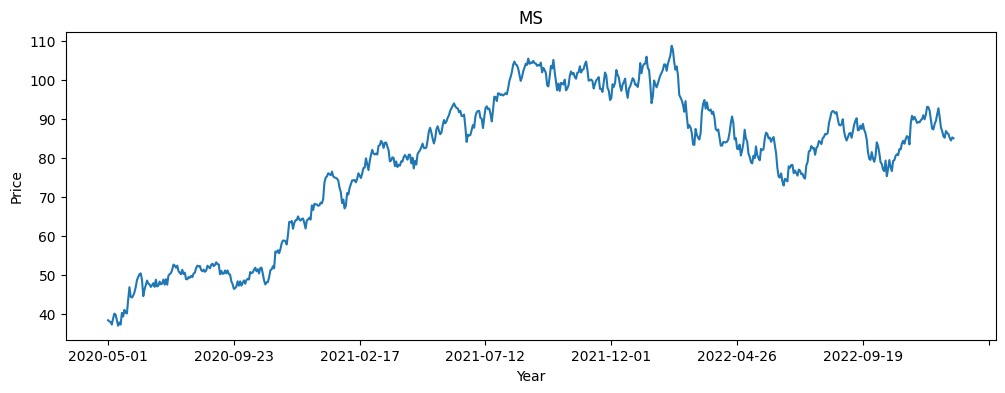

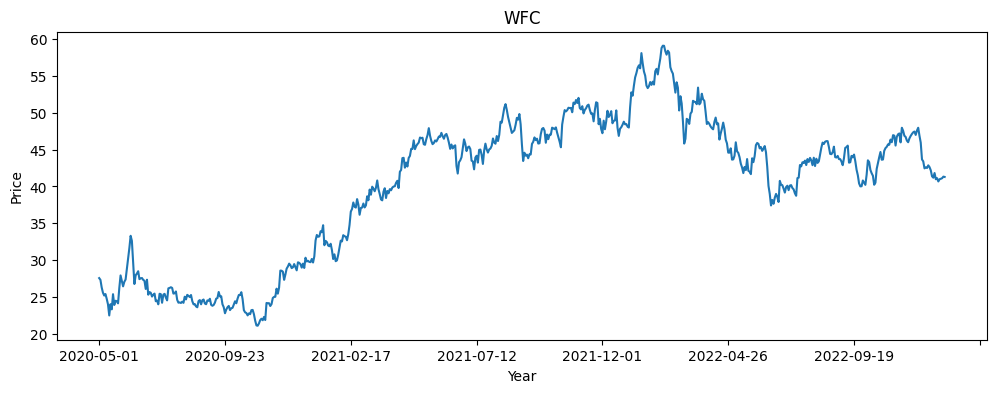

In [35]:
for tick in tickers:
    df[tick]['close'].plot(figsize=(12,4),label=tick)
    plt.title(tick)
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

In [36]:
returns1=pd.DataFrame()
for t in tickers:
    returns1[t+' Return 3']=df[t]['close'].pct_change()
returns1.head()

,BAC Return 3,C Return 3,GS Return 3,JPM Return 3,MS Return 3,WFC Return 3
2020-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-04,-0.006499,-0.008787,-0.006042,-0.011903,-0.008073,-0.008699
2020-05-05,-0.011775,-0.025931,0.012896,-0.001519,-0.002888,-0.037660
2020-05-06,-0.013680,-0.022753,-0.007740,-0.018804,-0.017904,-0.026976
2020-05-07,0.021924,0.039348,0.030522,0.010413,0.040483,-0.014838


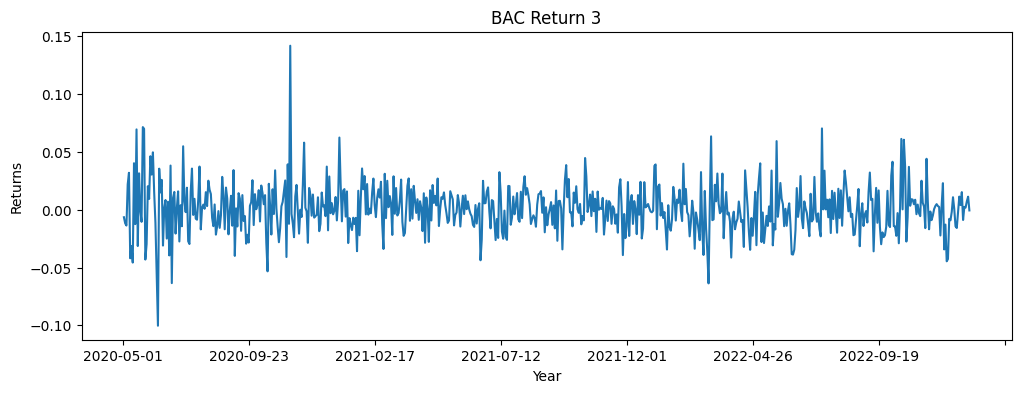

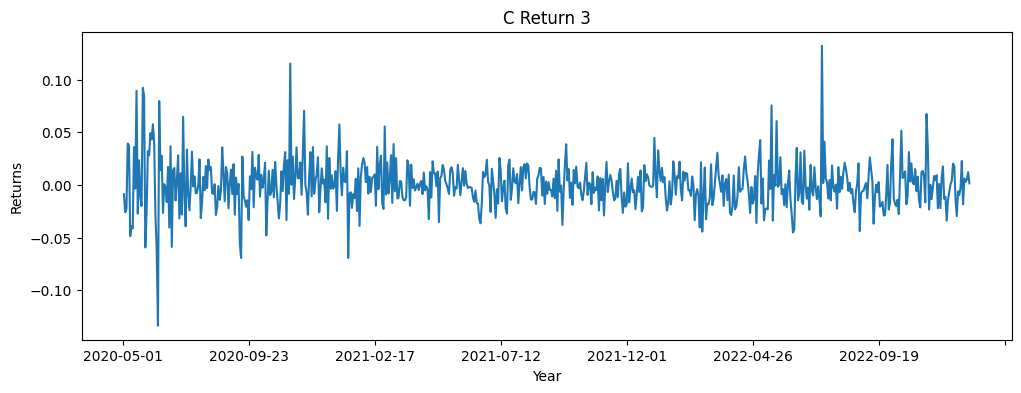

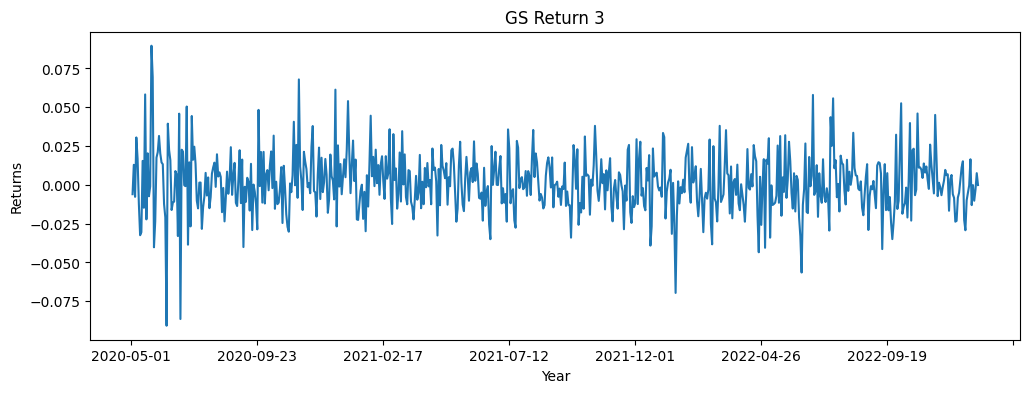

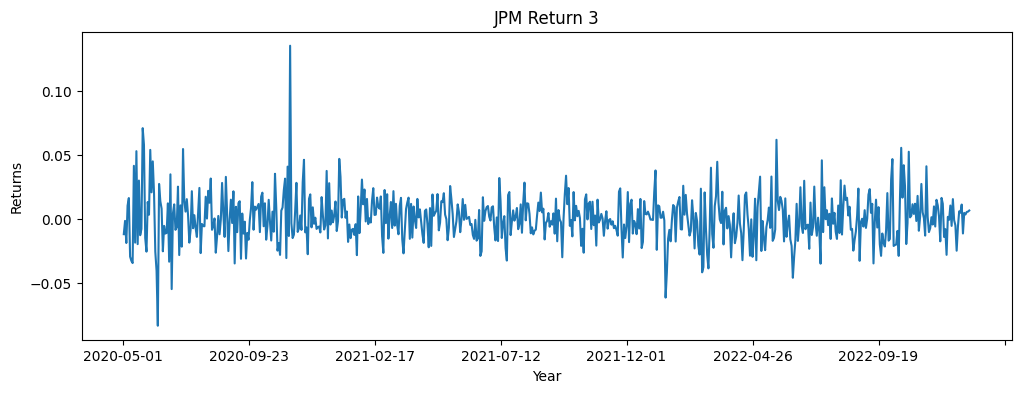

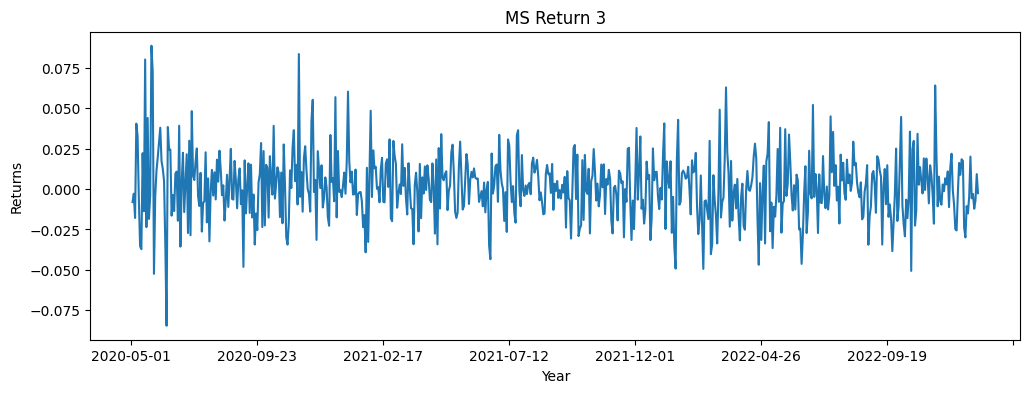

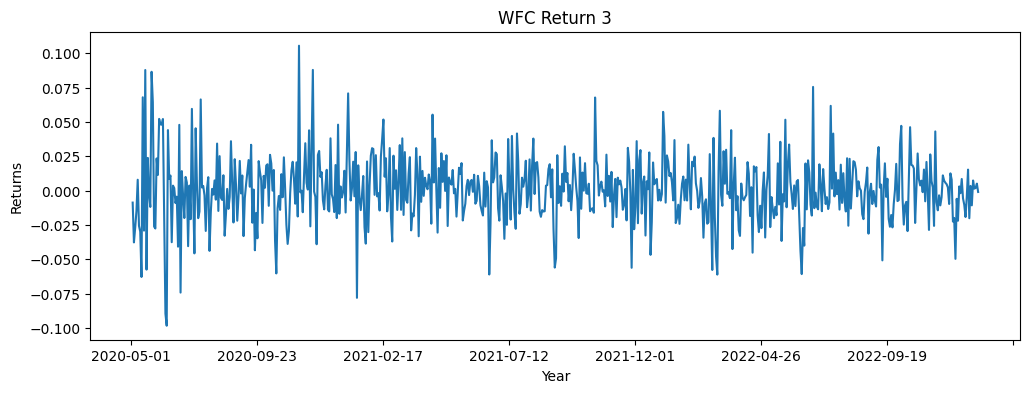

In [37]:
for i in returns1.columns:
    returns1[i].plot(figsize=(12,4))
    plt.title(i)
    plt.xlabel('Year')
    plt.ylabel('Returns')
    plt.show()

#### Annualized Returns of 3 years

In [38]:
annualized_return1=np.prod((1+returns1)**(252/len(returns1)))-1
annualized_return1

C:\Users\Viraj Chordiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


BAC Return 3    0.144809
C Return 3     -0.002390
GS Return 3     0.281367
JPM Return 3    0.145723
MS Return 3     0.346647
WFC Return 3    0.162954
dtype: float64

#### Annualized Volatility of 3 years

In [39]:
annualized_volatility1 = np.std(returns1)*np.sqrt(252)
annualized_volatility1

C:\Users\Viraj Chordiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


BAC Return 3    0.333062
C Return 3      0.358601
GS Return 3     0.302947
JPM Return 3    0.296616
MS Return 3     0.319683
WFC Return 3    0.382347
dtype: float64

#### Sharpe Ratio of 3 years

In [40]:
sharpe_ratio1 = (annualized_return1 - 0.1) / annualized_volatility1
sharpe_ratio1

BAC Return 3    0.134536
C Return 3     -0.285527
GS Return 3     0.598675
JPM Return 3    0.154148
MS Return 3     0.771537
WFC Return 3    0.164650
dtype: float64

* After the pandemic **Morgan Stanley and Goldman Sachs** exhibits a high Sharpe ratio, suggesting strong risk-adjusted performance.
* And **Bank of America and JPMorgan Chase** show moderate positive Sharpe ratios, indicating a balanced level of risk-adjusted performance.

## Section 2: Portfolio with minimum risk
* After analysis 10 and 3 years data we found **Morgan Stanley, Bank of America and JPMorgan Chase** are the better stocks amongst the 6 stocks
* Out of these 3 stocks I will select **Morgan Stanley and JPMorgan Chase** to create a portfolio of **Minimum Risk and Maximum Return**

In [41]:
annualised_return1 = np.prod((1+returns[['JPM Return','MS Return']])**(252/len(returns)))-1
annualised_return1

C:\Users\Viraj Chordiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


JPM Return    0.116321
MS Return     0.158065
dtype: float64

In [42]:
annualised_volatility1 = np.std(returns[['JPM Return','MS Return']])*np.sqrt(252)
annualised_volatility1

C:\Users\Viraj Chordiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


JPM Return    0.268440
MS Return     0.311819
dtype: float64

In [43]:
cov = returns[['JPM Return','MS Return']].cov()
cov

,JPM Return,MS Return
JPM Return,0.000286,0.000277
MS Return,0.000277,0.000386


In [44]:
def portfolio_return(weights , returns):
    return (weights.T @ returns)


def portfolio_volatility(weights , covmat):
    return (weights.T @ covmat @ weights)**0.5

In [45]:
weights_1 = [np.array([w , 1-w]) for w in np.linspace(0 , 1 , 10)]

In [46]:
retu = [portfolio_return(w , annualised_return1) for w in weights_1]

In [47]:
risk = [portfolio_volatility(w , cov) for w in weights_1]

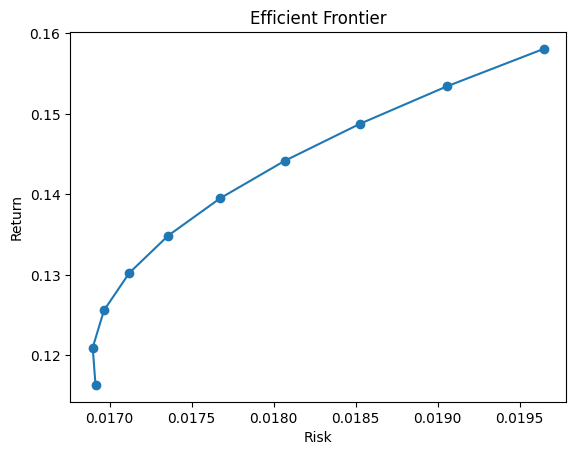

In [48]:
plt.plot(risk , retu , marker='o')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()

In [49]:
answer = pd.DataFrame(weights_1 , risk , columns = ['% in stock A' , '% in Stock B'])
answer = answer.reset_index()

In [50]:
answer = answer.rename(columns = {'index':'risk'})

In [51]:
pd.set_option('display.max_rows',None)
answer.loc[7]

risk            0.016965
% in stock A    0.777778
% in Stock B    0.222222
Name: 7, dtype: float64

* For **minimum risk** of **1.69%**, you should invest **78%** in **JPMorgan Chase** and **22%** in **Morgan Stanley**

## Final Conclusion:
* So if you look at the above graph you can see that the price of stock **BAC, GS, JPM, and MS** has steeply increased from 2013 to 2023 and the price of **C and WFC** is almost the same in 10 years.
* **Bank of America (BAC), Goldman Sachs (GS), JPMorgan Chase (JPM), and Morgan Stanley (MS)** have positive returns, suggesting a right-skewed distribution during 10 years
* **Morgan Stanley** appears to be the top performer in terms of risk-adjusted returns during 2013-2023,**Bank of America and JPMorgan Chase** also showed positive risk-adjusted returns
* After the pandemic **Morgan Stanley and Goldman Sachs** exhibits a high Sharpe ratio, suggesting strong risk-adjusted performance.
* **Morgan Stanley and JPMorgan Chase** was selected for a portfolio of **Minimum Risk and Maximum Return**
* For **minimum risk** of **1.69%**, you should invest **78%** in **JPMorgan Chase** and **22%** in **Morgan Stanley**